# Module Practice: 2D magnetic vector fields

The purpose of this exercise is to generate a full python module that generates two types of magnetic fields in 2D:

## 1. A uniform, oblique field:

$$\mathbf{B} = B_x\,\vec{i} + B_y\,\vec{j}$$

## 2. A dipolar Earth-life field. In this case, the field itself is a vector quantity:

$$\mathbf{B}(\mathbf{m}, \mathbf{r}) =
  \frac{\mu_0}{4\pi} \ \frac{3(\mathbf{m} \cdot \hat{\mathbf{r}}) \hat{\mathbf{r}} - \mathbf{m}}{r^3}$$

where:

- $B$ is the field

- $r$ is the absolute value of the position vector of the dipole

- $r̂$ is the unit vector parallel to $r$

- $m$ is the (vector) dipole moment

- $\mu_0$ is the permeability of free space


Let us consider the dipole to lie along the $y$-axis: $\boldsymbol{m} = m\boldsymbol{\hat{\jmath}}$ and define $\boldsymbol{B_0}$ to be the field perpendicular to $\boldsymbol{m}$ at a distance $R$ from it (<em>i.e.</em> on the Earth's magnetic equator):
$$
\boldsymbol{B_0} = -\frac{\mu_0m}{4\pi R^3} \boldsymbol{\hat{\jmath}} = B_0\boldsymbol{\hat{\jmath}}.
$$
Then,
$$
\boldsymbol{B}(\boldsymbol{r}) = -B_0 \left(\frac{R}{r}\right)^3 [3\cos\theta \boldsymbol{\hat{r}} - \boldsymbol{\hat{\jmath}}].
$$
The radial component of the magnetic field is therefore
$$
B_r = \boldsymbol{B}\cdot\boldsymbol{\hat{r}} = -B_0\left(\frac{R}{r}\right)^3[3\cos\theta - \cos\theta] = -2B_0\left(\frac{R}{r}\right)^3\cos\theta,
$$
Its angular component is perpendicular to this:
$$
B_\theta = \boldsymbol{B}\cdot\boldsymbol{\hat{\theta}} = - B_0 \left(\frac{R}{r}\right)^3 [-\boldsymbol{\hat{\jmath}} \cdot \boldsymbol{\hat{\theta}}] = -B_0\left(\frac{R}{r}\right)^3\sin\theta.
$$
Finally, $B_\phi = 0$: the field is symmetric about the axis of the dipole.


## Tasks:

- Construct a standalone python module that takes user inputs (B field type) and returns plots of the 2D vector fiels.

- Use decorators where you see they fit.
  
- Provide package installers and unit testing routines within your class.


In [2]:
import numpy as np

import matplotlib.pyplot as plt


In [3]:
x_l, x_r, y_l, y_r, n = -10, +10, -10, +10, 50

# 1D vectors
x = np.linspace(x_l, x_r, n)
y = np.linspace(y_l, y_r, n)

# Create the 2D grid
x_2d, y_2d = np.meshgrid(x, y)

# Return 
print(x_2d.shape)
print(y_2d.shape)

bx_2d = np.full_like(x_2d, 1.)
by_2d = np.full_like(y_2d, 1.)

b_mod = np.sqrt(bx_2d**2 + by_2d**2)
print(bx_2d.shape)
print(by_2d.shape)

(50, 50)
(50, 50)
(50, 50)
(50, 50)


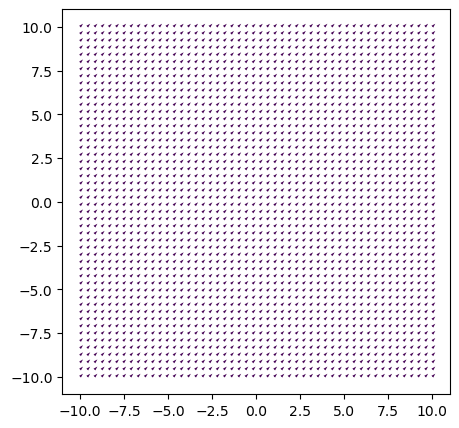

In [4]:
plt.figure(figsize = (5, 5))

plt.quiver(x_2d, y_2d, bx_2d, by_2d, b_mod)

plt.show()

### Full dipolar field derivation:

We start with the standard magnetic dipole field equation:

$$
\boldsymbol{B}(\boldsymbol{r}) = \frac{\mu_0}{4\pi} \frac{1}{r^3} \left[ 3 (\boldsymbol{m} \cdot \hat{\boldsymbol{r}}) \hat{\boldsymbol{r}} - \boldsymbol{m} \right].
$$

We assume that the **dipole moment** $\boldsymbol{m}$ is aligned with the $y$-axis:

$$
\boldsymbol{m} = m \boldsymbol{\hat{\jmath}}.
$$

To define the reference field $\boldsymbol{B_0}$, we consider the field **on the equator** at a distance $R$ from the dipole center (i.e., at $\theta = 90^\circ$). On the equatorial plane:

- $\hat{\boldsymbol{r}}$ is purely in the radial direction.
- The dot product simplifies: $\boldsymbol{m} \cdot \hat{\boldsymbol{r}} = m \cos\theta$.
- The magnetic field at this location is purely in the **negative $y$-direction**.

Substituting $\theta = 90^\circ$, we get:

$$
\boldsymbol{B_0} = \frac{\mu_0}{4\pi} \frac{1}{R^3} \left[ 3 (\boldsymbol{m} \cdot \hat{\boldsymbol{r}}) \hat{\boldsymbol{r}} - \boldsymbol{m} \right].
$$

Since on the equator $\cos 90^\circ = 0$, the first term vanishes, leaving:

$$
\boldsymbol{B_0} = -\frac{\mu_0 m}{4\pi R^3} \boldsymbol{\hat{\jmath}}.
$$

Defining the reference magnitude $B_0$ as:

$$
B_0 = -\frac{\mu_0 m}{4\pi R^3},
$$

we rewrite:

$$
\boldsymbol{B_0} = B_0 \boldsymbol{\hat{\jmath}}.
$$


Now, we use the full dipole field equation:

$$
\boldsymbol{B}(\boldsymbol{r}) = \frac{\mu_0}{4\pi} \frac{1}{r^3} \left[ 3 (\boldsymbol{m} \cdot \hat{\boldsymbol{r}}) \hat{\boldsymbol{r}} - \boldsymbol{m} \right].
$$

Substituting $\boldsymbol{m} = m \boldsymbol{\hat{\jmath}}$:

$$
\boldsymbol{B}(\boldsymbol{r}) = \frac{\mu_0}{4\pi} \frac{1}{r^3} \left[ 3 m \cos\theta \hat{\boldsymbol{r}} - m \boldsymbol{\hat{\jmath}} \right].
$$

Factoring out $m$:

$$
\boldsymbol{B}(\boldsymbol{r}) = \frac{\mu_0 m}{4\pi} \frac{1}{r^3} \left[ 3\cos\theta \hat{\boldsymbol{r}} - \boldsymbol{\hat{\jmath}} \right].
$$

Rewriting in terms of $B_0$, we use:

$$
\frac{\mu_0 m}{4\pi} = -B_0 R^3.
$$

Thus:

$$
\boldsymbol{B}(\boldsymbol{r}) = -B_0 \left(\frac{R}{r}\right)^3 \left[ 3\cos\theta \boldsymbol{\hat{r}} - \boldsymbol{\hat{\jmath}} \right].
$$
